# Adding ellipse count as a feature

>1. Load data
>2. Find count of ellipses for each element
>3. Calculate the average # of ellipses for each class
>4. Plot distribution of ellipse count by class

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as skl_svm
import sklearn.cross_validation as skl_cv
import seaborn as sns
sns.set_context(context = 'notebook', font_scale=1.5)
import os
import sys
import cv2

base_path = '/home/lundi/Python/MNIST/'
sys.path.append(base_path + '/libraries/')

import MNIST_data_processor as mdp

MNIST_data_processor = mdp.MNIST_data_processor()

from matplotlib.patches import Ellipse

## 1. Load data

In [2]:
X, y = MNIST_data_processor.load_subset_data()

## 2. Find count of ellipses for each element

In [3]:
def convert_to_image(data):
    img = np.zeros((28, 28,3))
    img[:,:,0] = data.reshape(28,28)
    img[:,:,1] = data.reshape(28,28)
    img[:,:,2] = data.reshape(28,28)
    
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return img

In [4]:
def get_ellipse_count(digit_data):
    
    image = convert_to_image(digit_data)
    
    ret,thresh = cv2.threshold(image,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    
    return len(contours)

In [5]:
X['ellipse_count'] = X.apply(get_ellipse_count, axis=1)

/home/lundi/.virtualenvs/default_venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## 3. Calculate the average # of ellipses for each class

In [6]:
data = pd.concat([X, y], axis=1)

In [7]:
data.groupby(['label'])['ellipse_count'].mean()

label
0    1.941296
1    1.030466
2    1.488073
3    1.108333
4    1.125786
5    1.170576
6    1.990310
7    1.051383
8    2.732218
9    1.903766
Name: ellipse_count, dtype: float64

## 4. Plot distribution of ellipse count by class

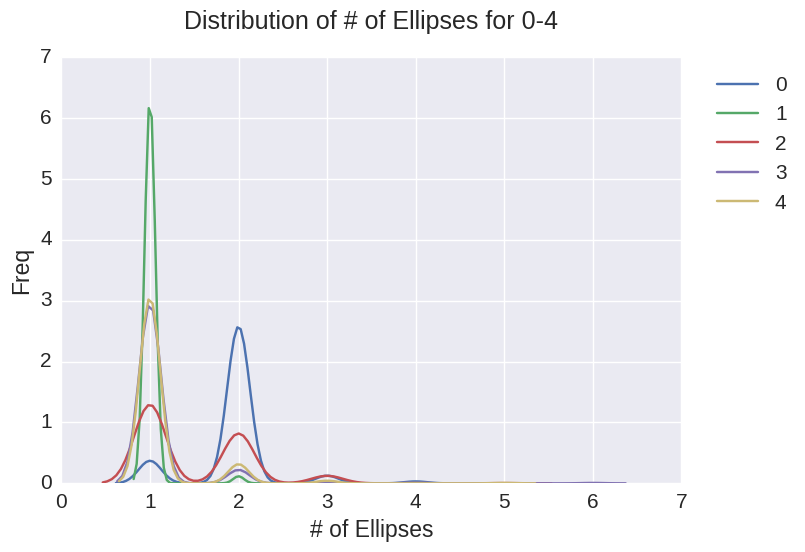

In [8]:
for label_index in xrange(0,5): 
    label_data = data.loc[data['label'] == label_index, 'ellipse_count']
    
    sns.kdeplot(label_data, label = str(label_index))
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.2,1))
ax.set_xlabel('# of Ellipses')
ax.set_ylabel('Freq')
ax.set_title('Distribution of # of Ellipses for 0-4', y=1.05)

* 0 typically has 1-2 ellipses
* 1 has 1 ellipse typically
* 2 has 1-2 ellipses
* 3 and 4 have 1 most of the time

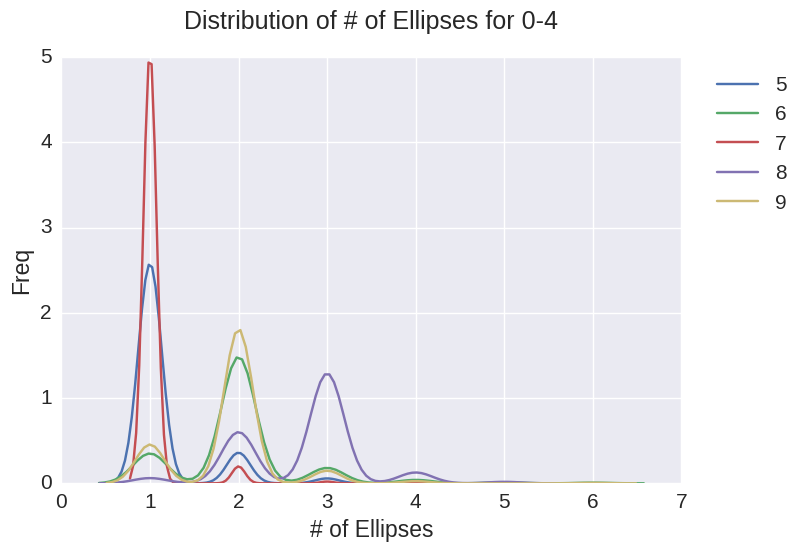

In [9]:
for label_index in xrange(5,10): 
    label_data = data.loc[data['label'] == label_index, 'ellipse_count']
    
    sns.kdeplot(label_data, label = str(label_index))
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.2,1))
ax.set_xlabel('# of Ellipses')
ax.set_ylabel('Freq')
ax.set_title('Distribution of # of Ellipses for 0-4', y=1.05)

* 7 has very few ellipses
* 8 typically has quite a few ellipses

In [10]:
data.to_csv('./../../data/intermediate/train_with_ellipse_count.csv',index=False)